In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy 
import numpy as np
import os
import io
import codecs



os.chdir("") # Search terms directory 
df = pd.read_csv('search_Terms.csv') 
dim = df.shape
df = df.iloc[0:dim[0], 1:5] #abridged csv

#cleaned database of search terms
df2 = []
ct = 0
col_ct = 0

for col in df.columns:
    for row in df[col]:
        if (col_ct == 0):
#             new = str(row)+ " "
            new = str(row)
        else:
            new = df2[ct] + " " + str(row)
            new = new.replace(' nan','') #deletes empty cells
            new = new.replace('  ',' ') #deletes double spaces 
            if(new[len(new)-1] == " "):
                new = new[:-1]
#         print(new)
        df2.append(new)
        ct +=1
        
    ct =0
    col_ct+=1
    

df = []                
for x in df2:
    if x not in df:
        df.append(x)

store = np.zeros(shape=(3,len(df)), dtype=object) #VERY IMPORTANT

#Search Algorithm
direct = "" #specific block directory
os.chdir(direct)
folder = []
for root, dirs, files in os.walk("."):
    for filename in files:
        folder.append(filename)

data = []
lin = []
title = folder [0]
ct = 0
# store = np.zeros(shape=(3,len(df)), dtype=object)
# df.sort()

ct2 = 0
for term in df:
#     if (ct2<=70):
#         term = " "+term
    store[0,ct2] = str(term)
    ct2 +=1


# for title in folder:
os.chdir(direct)
df3 = []

for file in folder:
    filename = file
    zero = np.zeros(shape=(1,len(df)), dtype=object)

    with codecs.open(filename, 'r', encoding='utf-8',errors='ignore') as file:
        for line in file:
            lin.append(line)
            index = 0
            for word in line.split():
                index = 0
                low = word.lower()  
                for y in store[0]:
                    check = y.lower() 
                    pos = low.find(check)

                    if (pos==0):
                        store[1,index] = store[1,index] + 1
                        zero[0,index] += 1
                        temp_store = str(store[2,index])+'\n\n' 
                        store[2,index] = temp_store+line
                        df3.append((str(store[0,index]),str(filename),str(line)))
    #                     temp = file 

    #                     try: 
    #                         if (len(temp) >= 400):
    #                             context = temp.find(check)
    #                             rel = context/len(temp)
    #                             if (rel >=.8):
    #                                 print(temp[context-300:context+100])
    #                             elif (rel >.2) and (rel<.8):
    #                                 print(temp[context-200:context+200])
    #                             else:
    #                                 print(temp[context-100:context+300])
    #                         else:
    #                             print(temp)
    #                     except:
    #                         print('unable to store context')

    #                     try:

    #                     except:
    #                         print('unable to store conext')

                    index +=1



    index = 0
    while index<113:
        if(zero[0,index]>0):
            temp = str(store[2,index])
            store[2,index] = '\n\n'+str(filename)+ temp[1:]
        index +=1
# print(store[2,1])           

In [33]:
# from docx import Document
# from docx.shared import Inches
# from docx.shared import Pt
# from docx.enum.style import WD_STYLE_TYPE
# from docx.shared import Cm, Inches            
            
    
# os.chdir("") # directory where you wan to create output

# # def make_rows_bold(*rows):
# #     for row in rows:
# #         for cell in row.cells:
# #             for paragraph in cell.paragraphs:
# #                 for run in paragraph.runs:
# #                     run.font.bold = True


# document = Document()

# styles = document.styles
# new_heading_style = styles.add_style('New Heading', WD_STYLE_TYPE.PARAGRAPH)
# new_heading_style.base_style = styles['Heading 1']
# font = new_heading_style.font
# font.name = 'Arial'
# font.size = Pt(16)
# document.add_paragraph('PPS 2 Search', style='New Heading')


# style = document.styles['Normal']
# font = style.font
# font.name = 'Times New Roman'
# font.size = Pt(12)



# # p = document.add_paragraph('A plain paragraph having some ')
# # p.add_run('bold').bold = True
# # p.add_run(' and some ')
# # p.add_run('italic.').italic = True

# # document.add_heading('Heading, level 1', level=1)
# # # document.add_paragraph('Intense quote', style='Intense Quote')

# # document.add_paragraph(
# #     'first item in unordered list', style='List Bullet'
# # )
# # document.add_paragraph(
# #     'first item in ordered list', style='List Number'
# # )

# # document.add_picture('monty-truth.png', width=Inches(1.25))

# table = document.add_table(rows=1, cols=2)
# table.allow_autofit  = False
 

# # for cell in table.columns[0].cells:
# #     cell.width = Cm(.5)

# for cell in table.columns[1].cells:
#     cell.width = Inches(20.5)
    
# sections = document.sections
# margin = .5
# for section in sections:
#     section.top_margin = Cm(margin)
#     section.bottom_margin = Cm(margin)
#     section.left_margin = Cm(margin)
#     section.right_margin = Cm(margin)
    
# table.style = 'Table Grid'

# hdr_cells = table.rows[0].cells
# hdr_cells[0].text = 'Word'
# hdr_cells[1].text = 'Lecture + Context'

# for x,y,z in df3:
#     row_cells = table.add_row().cells
#     row_cells[0].text = str(x)
#     row_cells[1].text = str(y)+"\n\n"+str(z)



# bolding_columns = [0]
# length = (len(df3))+1
# for row in list(range(length)):
#     for column in bolding_columns:
#         table.rows[row].cells[column].paragraphs[0].runs[0].font.bold = True
        
# table.rows[0].cells[1].paragraphs[0].runs[0].font.bold = True

# # document.add_page_break()
# pos = 0
# for x in direct[::-1]:
#     pos +=1
#     if(x == "/"):
#         temp = len(direct) - pos + 1
#         title = (direct[temp:])
        
#         break
        

# document.save('./Output/'+title+'.docx')

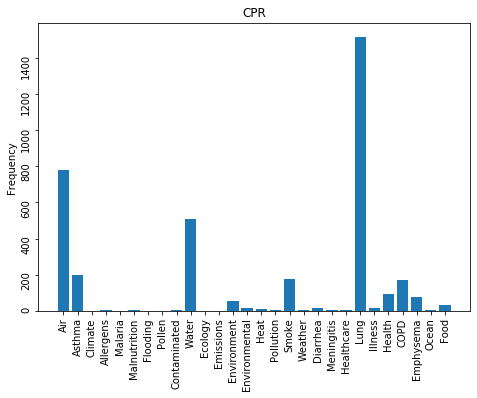

In [35]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

pos = 0

for x in direct[::-1]:
    pos +=1
    if(x == "/"):
        temp = len(direct) - pos + 1
        title = (direct[temp:])
        
        break
        
ax.set_title(str(title))


names = []
freq = []
index = 0
for x in store[0]:
    val = store[1,index]
    if (val>0):
        names.append(str(x))
        freq.append(val)
    index +=1
    
ax.bar(names,freq)
plt.ylabel('Frequency')

ax.tick_params(labelrotation = 90)
plt.show()

os.chdir("") #graph output directory
fig.savefig(title,bbox_inches="tight")

In [36]:
os.chdir("") #raw data output directory
np.savetxt(title+".csv", store[1], delimiter=",", fmt='%d')